### Requirments

In [1]:
!pip install pandas numpy matplotlib seaborn plotly tensorflow scikit-learn Pillow 


[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip


### Imports

In [3]:
import numpy as np
import os ,PIL
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D,BatchNormalization,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import shutil
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications import MobileNet
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau



### Configs

In [4]:
# Set the path to your dataset directory
dataset_dir = "crop_images"

# Set the path to the directory where you want to save the train and test data
train_dir = "Data3//Train"
test_dir = "Data3//Test"

valid_dir = test_dir
CLASS_LABELS  =  os.listdir(dataset_dir)
NUM_CLASSES = len(CLASS_LABELS)

EARLY_STOPPING_CRITERIA=3 
SEED = 12

IMG_HEIGHT = 256
IMG_WIDTH = 256
IMG_SIZE = 256

LR = 0.001
BATCH_SIZE = 10



### Train test split


In [5]:
dataset_dir = "crop_images"
train_dir = "Data3/Train"
test_dir = "Data3/Test"

# Set the test size (e.g., 20% of the data will be used for testing)
test_size = 0.2
train_size = 0.8
# Get the list of subdirectories (class labels) in the dataset directory
class_labels = os.listdir(dataset_dir)

# Create the train and test directories#optional
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Split the dataset into train and test sets for each cass
for label in class_labels:
    label_dir = os.path.join(dataset_dir, label)
    train_label_dir = os.path.join(train_dir, label)
    test_label_dir = os.path.join(test_dir, label)
    os.makedirs(train_label_dir, exist_ok=True)
    os.makedirs(test_label_dir, exist_ok=True)

    # Get the list of image files in the current class directory
    images = os.listdir(label_dir)

    # Split the image files into train and test sets
    train_images, test_images = train_test_split(images, test_size=test_size,train_size=train_size)

    # # Move the train images to the train directory
    # for train_image in train_images:
    #     src = os.path.join(label_dir, train_image)
    #     dst = os.path.join(train_label_dir, train_image)
    #     shutil.move(src, dst)

    # Copy the train images to the train directory
    for train_image in train_images:
        src = os.path.join(label_dir, train_image)
        dst = os.path.join(train_label_dir, train_image)
        shutil.copy(src, dst)

    # Move the test images to the test directory
    # for test_image in test_images:
    #     src = os.path.join(label_dir, test_image)
    #     dst = os.path.join(test_label_dir, test_image)
    #     shutil.move(src, dst)


    # Copy the test images to the test directory
    for test_image in test_images:
        src = os.path.join(label_dir, test_image)
        dst = os.path.join(test_label_dir, test_image)
        shutil.copy(src, dst)

### 3. Defining Model

In [6]:
# Set the number of classes
num_classes = len(CLASS_LABELS)

# Load the pre-trained MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256,256, 3))

# Create a Sequential model
model = Sequential()


# Add the pre-trained MobileNet base to the Sequential model
model.add(base_model)
model.add(GlobalAveragePooling2D())

# Add multiple hidden layers
model.add(Dense(128, activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))   # Second hidden layer
model.add(Dense(32, activation='relu'))   # Third hidden layer, you can add more if needed

# Add the output layer
model.add(Dense(num_classes, activation='softmax'))  # Assuming num_classes is defined


for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) 

# Print the model summary
model.summary()


/tmp/ipykernel_16726/4288088892.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256,256, 3))
2024-06-26 13:08:24.189496: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-06-26 13:08:24.190081: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registe

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ ?                      │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

### Model training

Found 288 images belonging to 5 classes.
Found 70 images belonging to 5 classes.
Epoch 1/10


/home/chaya/Documents/Projects/crop-classification/cnn/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.9578 - loss: 0.3576 - val_accuracy: 0.4688 - val_loss: 1.3641
Epoch 2/10


2024-06-26 13:18:06.021523: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-06-26 13:18:07.529925: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 556ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.1763
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.9806 - loss: 0.2573 - val_accuracy: 0.5156 - val_loss: 1.3034
Epoch 4/10


2024-06-26 13:19:10.935998: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-26 13:19:11.463159: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 222ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.3871
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 69s 7s/step - accuracy: 0.9826 - loss: 0.1772 - val_accuracy: 0.5312 - val_loss: 1.4072
Epoch 6/10


2024-06-26 13:20:21.677774: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-26 13:20:22.607196: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 418ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.3154
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 75s 7s/step - accuracy: 0.9939 - loss: 0.1210 - val_accuracy: 0.5625 - val_loss: 1.2868
Epoch 8/10


2024-06-26 13:21:40.150142: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-26 13:21:40.685113: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 2.0980
Epoch 9/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 67s 7s/step - accuracy: 0.9908 - loss: 0.0907 - val_accuracy: 0.4844 - val_loss: 1.4678
Epoch 10/10


2024-06-26 13:22:47.924137: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-26 13:22:48.355221: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.1368
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.5000 - loss: 1.4479


Validation accuracy: 53.12%


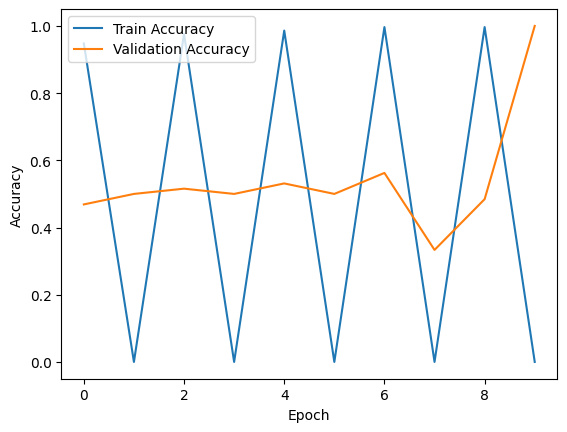

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 757ms/step


TypeError: missing a required argument: 'y_true'

In [8]:
# Prepare the data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% validation split
)

train_generator = train_datagen.flow_from_directory(
    'crop_images',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    'crop_images',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # Adjust the number of epochs as needed
)

# Evaluate the model
val_loss, val_acc = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation accuracy: {val_acc * 100:.2f}%')

# Save the model
model.save('krishimitra.h5')

# Plot training results (optional)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Generate predictions and true labels
validation_generator.reset()
Y_pred = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)
y_true = validation_generator.classes[:len(y_pred)]  # Ensure lengths match

# Plot the confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = confusion_matrix(confusion_matrix=cm, display_labels=list(validation_generator.class_indices.keys()))
disp.plot(cmap='Blues')
plt.show()

In [6]:

# Set the number of classes
num_classes = len(CLASS_LABELS)

# Load the pre-trained MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256,256, 3))

# Create a Sequential model
model = Sequential()


# Add the pre-trained MobileNet base to the Sequential model
model.add(base_model)
model.add(GlobalAveragePooling2D())

# Add multiple hidden layers
model.add(Dense(128, activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))   # Second hidden layer
model.add(Dense(32, activation='relu'))   # Third hidden layer, you can add more if needed

# Add the output layer
model.add(Dense(num_classes, activation='softmax'))  # Assuming num_classes is defined


for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy']) 

# Print the model summary
model.summary()



/tmp/ipykernel_15473/866863716.py:5: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256,256, 3))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ ?                      │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [6]:
model.save("Krishimithra1.h5")

Found 288 images belonging to 5 classes.
Found 70 images belonging to 5 classes.


/tmp/ipykernel_15473/1657412111.py:42: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ ?                      │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ ?                      │   0 (unbuilt) │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 3,206,976 (12.23 MB)

 Non-trainable params: 21,888 (85.50 KB)

Epoch 1/10


/home/chaya/Documents/Projects/crop-classification/cnn/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 64s 6s/step - accuracy: 0.2111 - loss: 1.6833 - val_accuracy: 0.1719 - val_loss: 1.6559
Epoch 2/10


2024-06-26 00:48:14.039432: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-06-26 00:48:15.758888: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 1.3410
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 58s 5s/step - accuracy: 0.4970 - loss: 1.2841 - val_accuracy: 0.2969 - val_loss: 1.5943
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 1.5070
Epoch 5/10


2024-06-26 00:49:13.519341: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-26 00:49:13.693965: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.6716 - loss: 1.0655 - val_accuracy: 0.3906 - val_loss: 1.5226
Epoch 6/10


2024-06-26 00:50:03.864331: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-26 00:50:04.031466: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 1.2692
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 48s 5s/step - accuracy: 0.8615 - loss: 0.7981 - val_accuracy: 0.4375 - val_loss: 1.4613
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.8459
Epoch 9/10


2024-06-26 00:50:52.146513: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-26 00:50:52.259370: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 41s 4s/step - accuracy: 0.8607 - loss: 0.6433 - val_accuracy: 0.4531 - val_loss: 1.4820
Epoch 10/10


2024-06-26 00:51:33.213301: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-06-26 00:51:33.409894: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.2116
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.4583 - loss: 1.4337


Validation accuracy: 48.44%


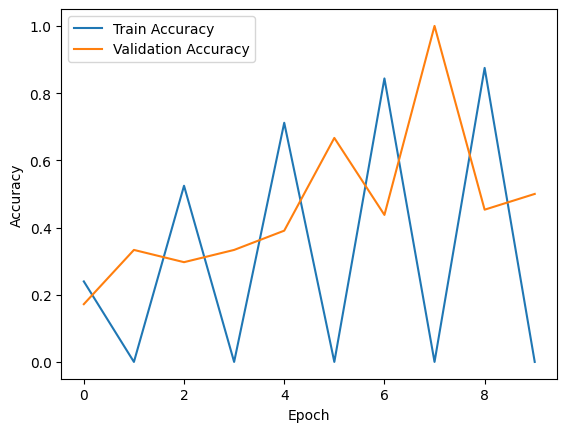

In [8]:
# Assuming CLASS_LABELS is defined with your class labels
#CLASS_LABELS = ['wheat','jute', 'rice', 'sugaracne', 'maize']
 # Define your class labels here

# Set the number of classes
#num_classes = len(CLASS_LABELS)

# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% validation split
)

train_generator = train_datagen.flow_from_directory(
    'crop_images',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # This generator will be used for training
)

validation_generator = train_datagen.flow_from_directory(
    'crop_images',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # This generator will be used for validation
)

# Load the pre-trained MobileNet model
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Create a Sequential model
model = Sequential()

# Add the pre-trained MobileNet base to the Sequential model
model.add(base_model)
model.add(GlobalAveragePooling2D())

# Add multiple hidden layers
model.add(Dense(128, activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))   # Second hidden layer
model.add(Dense(32, activation='relu'))   # Third hidden layer, you can add more if needed

# Add the output layer
model.add(Dense(num_classes, activation='softmax'))  # Assuming num_classes is defined

# Unfreeze the last 20 layers of the base model
for layer in base_model.layers[-20:]:
    layer.trainable = True

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # Adjust the number of epochs as needed
)

# Evaluate the model
val_loss, val_acc = model.evaluate(validation_generator, steps=validation_generator.samples // validation_generator.batch_size)
print(f'Validation accuracy: {val_acc * 100:.2f}%')

# Save the model
model.save('krishimitra.h5')

# Plot training results (optional)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



In [9]:
model.save('krishimitra.h5')